In [2]:
from funs.data_prep_beat import *

In [3]:
## Parameter settings

# fs is the sampling frequency
# T_obs is the observation time 
# M0 is the initial mass of the black hole (BH) in units of solar mass
# alpha0 is the multiplication of the initial BH mass and the scalar mass
# as0 is the inital BH spin
# Ms0_0 is the condensate mass of {0,1,1} mode in units of initial BH mass
# Ms0_0 is the condensate mass of {1,1,1} mode in units of initial BH mass
# z is the redshift 
# ra and dec represent sky position
# iota is the inclination of condensate
# phi is the reference phase
# psi is the polarisation angle
fs = 8192
T_obs = 10
M0 = 50
alpha0 = 0.2
as0 = 0.998
Ms0_0 = 10**-5
Ms0_1 = 10**-5
z = 0.00025
ra = 0
dec = 0
iota = 0
phi = 0
psi = 0

# The frequency of gravitational waves (GWs) and its beat in the detector frame
f_GW = 64623.1 * alpha0 / M0
f_beat = 0.831 * (M0 / 10)**2 * (f_GW / 10**3)**3
print("The GW frequency in the detector frame is",f_GW/(1+z),"Hz.")
print("The GW beat frequency in the detector frame is",f_beat/(1+z),"Hz.")

## Combine some parameters into one variable
par = SRparams(M0,alpha0,as0,Ms0_0,Ms0_1,z,ra,dec,iota,phi,psi)

The GW frequency in the detector frame is 258.42779305173707 Hz.
The GW beat frequency in the detector frame is 0.358736700069763 Hz.


In [4]:
# ht,hp,hc = gen_signal(...)
    # hp and hc are the GW polarization
    # ht is the strain after appling antenna response
# dets is the detectors, including 'H1' and 'L1'
# 'verbose=True' indicates showing the SNR and the delay time
ht,_,_ = gen_signal(fs,T_obs,pars=par,dets=['H1'],verbose=True)

Thu Jul 18 16:35:24 2024: computed H1 Earth centre time delay = -0.014204733563658188
Thu Jul 18 16:35:24 2024: computed the network SNR = [1.292624128951716]


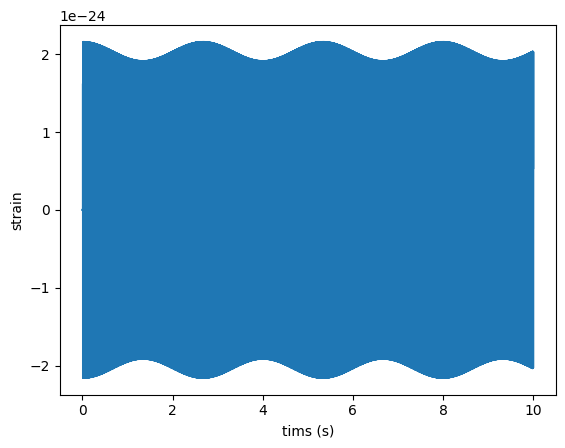

In [5]:
import matplotlib.pyplot as plt

t_range = np.arange(0, T_obs, 1/fs)

plt.plot(t_range, ht[0])  # Plot x vs. y data
plt.xlabel('tims (s)')  # Label for the x-axis
plt.ylabel('strain')  # Label for the y-axis

plt.savefig('beat_example.pdf') # Save the plot

plt.show()  # Display the plot

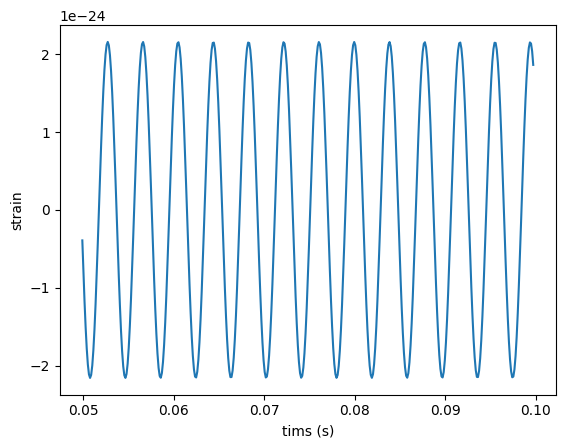

In [6]:
# Waveforms over a shorter period of time
N = len(t_range)
N1 = N//200
N2 = 2*N1
ht_new = ht[0,N1:N2]
t_new = t_range[N1:N2]

plt.plot(t_new, ht_new)  # Plot x vs. y data
plt.xlabel('tims (s)')  # Label for the x-axis
plt.ylabel('strain')  # Label for the y-axis

plt.savefig('beat_example_shorter.pdf')

plt.show()  # Display the plot